# K-means Clustering Exercise: Wine Classification

In this exercise, you will use K-means clustering to group wines based on their chemical properties. You will be working with the Wine dataset from sklearn.

## Dataset Description
The Wine dataset contains the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The dataset has 13 features including:
- Alcohol content
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

## Your Task
1. Load and explore the dataset
2. Preprocess the data
3. Implement K-means clustering
4. Evaluate the clustering results
5. Visualize the clusters
6. Interpret the results

Follow the steps below and fill in the code where indicated.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Import necessary libraries
# Your code here: Import numpy, pandas, matplotlib.pyplot, and required sklearn modules

# Load the dataset
# Your code here: Load the wine dataset and create a DataFrame
wine = load_wine()
print(wine.feature_names)

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
#
wine_df['Wine_Class'] = wine.target
print(wine_df.head(4))

print(wine.target_names)

print(pd.Series(wine.target).value_counts().sort_index())

# Display the first few rows and basic information about the dataset
# Your code here

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   

   od280

## Data Preprocessing
1. Check for missing values
2. Scale the features
3. Prepare the data for clustering

Your task:
- Examine the data for any missing values
- Scale the features using StandardScaler
- Prepare the data for clustering

In [17]:
# Your code here
# 1. Check for missing values
print(wine_df.isnull().sum())
# 2. Scale the features
scaler=StandardScaler()
scaled_data=scaler.fit_transform(wine_df)
# 3. Convert scaled data to DataFrame
scaled_df=pd.DataFrame(data=scaled_data,columns=wine_df.columns)


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


## K-means Implementation
1. Determine the optimal number of clusters using the elbow method
2. Train the K-means model
3. Get cluster assignments

Your task:
- Implement the elbow method to find the optimal number of clusters
- Create and train the K-means model
- Assign cluster labels to the data points

(178, 13)


c:\Users\anton\anaconda3\envs\ml_fixed\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\anton\anaconda3\envs\ml_fixed\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\anton\anaconda3\envs\ml_fixed\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\anton\anaconda3\envs\ml_fixed\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

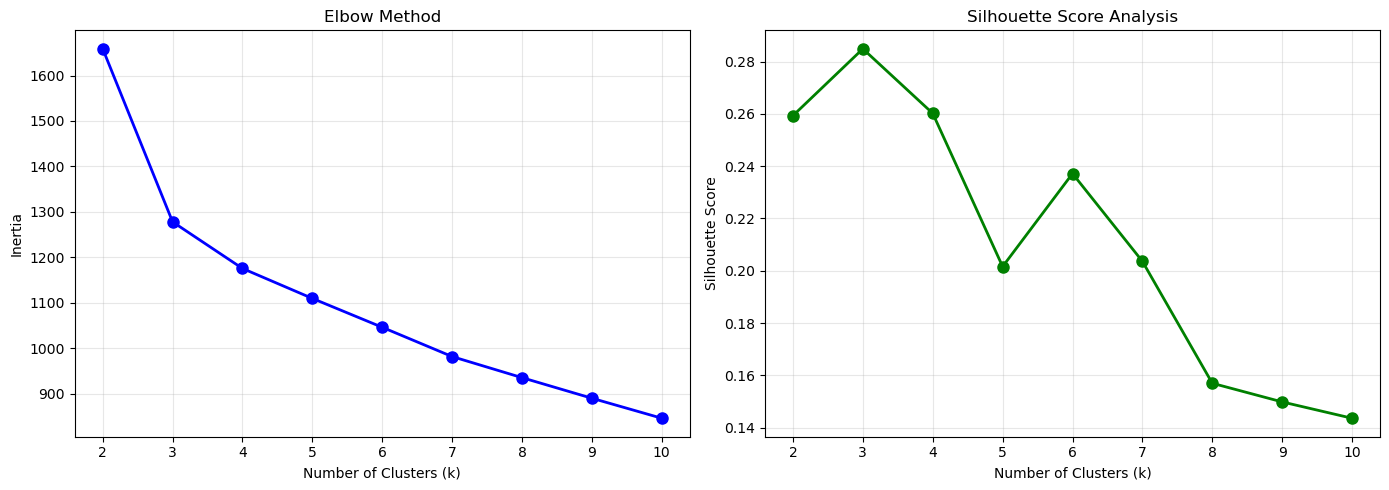

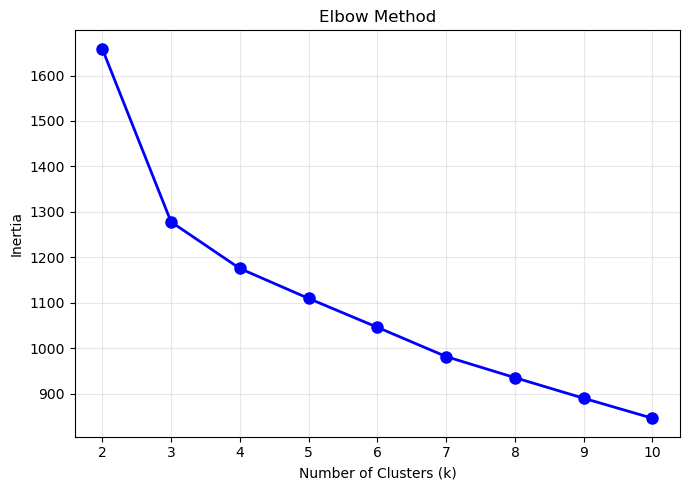

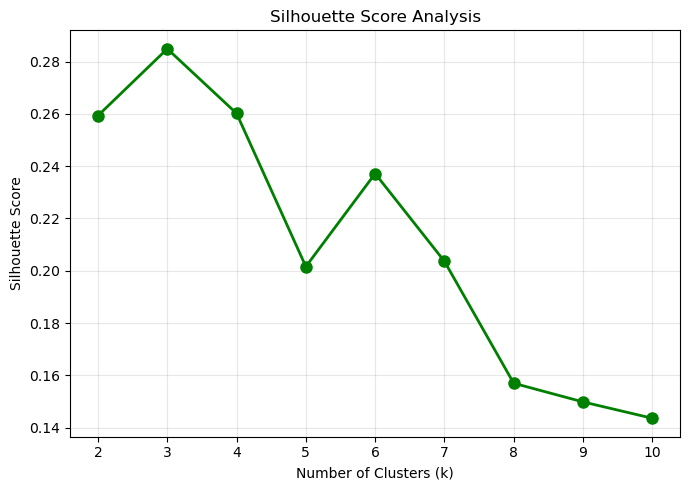


Optimal clusters: 3
Silhouette Score: 0.2849

Cluster distribution:
Cluster
0    65
1    51
2    62
Name: count, dtype: int64


c:\Users\anton\anaconda3\envs\ml_fixed\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Prepare data for clustering (features only, no labels)
X = scaled_data
print(X.shape)

inertias = []  # ✅ Changed from 'inertia' to 'inertias'
silhouette_scores = []  # ✅ Changed from 'silhouette' to 'silhouette_scores'
K_range = range(2, 11)  # ✅ Changed from 'k_range' to 'K_range'

for k in K_range:  # ✅ Loop uses K_range
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)  # ✅ Append to 'inertias'
    silhouette_value = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_value)  # ✅ Append to 'silhouette_scores'

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow curve
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].grid(True, alpha=0.3)

# Silhouette scores
axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score Analysis')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



# === Figure 1: Elbow curve ===
plt.figure(figsize=(7, 5))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# === Figure 2: Silhouette scores ===
plt.figure(figsize=(7, 5))
plt.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

k=3
kmeans_final = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_final.fit(X)
scaled_df['Cluster'] = kmeans_final.labels_
print(f"\nOptimal clusters: {k}")
print(f"Silhouette Score: {silhouette_score(X, kmeans_final.labels_):.4f}")
print(f"\nCluster distribution:")
print(scaled_df['Cluster'].value_counts().sort_index())

## Visualization and Evaluation
1. Create scatter plots to visualize the clusters
2. Analyze cluster characteristics
3. Evaluate cluster quality

Your task:
- Create visualizations to show the clustering results (choose relevant features)
- Analyze the characteristics of each cluster
- Evaluate the quality of the clustering

In [46]:
from sklearn.metrics import f1_score, accuracy_score, precision_score
print(wine.target)
print(kmeans_final.labels_)
y_label=wine.target
y_pred=kmeans_final.labels_
print(accuracy_score(y_label,y_pred))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.016853932584269662


## Conclusion
Summarize your findings and interpret the results. Consider the following questions:

1. How well did the K-means algorithm separate the clusters?
2. What are the main characteristics of each cluster?
3. What are some limitations of using K-means for this dataset?
4. How might you improve the clustering results?